# Example of a beam embedded on the left and with a point force on the right. 

# 1) First try

In [13]:
using BoundaryValueDiffEq
using Plots 

In [14]:
# solves the scalar diffusion equatiobn -d^4/dx^4 u(x) = f(x)
# on the interval 0 < x < 80
# supplied with Dirichlet or Neumann boundary conditions 

In [15]:
# define spatial range 
xspan = (0.0, 80.)

(0.0, 80.0)

In [16]:
function source_function(x)
    X0 = 80.0
    σ = 0.8
    A = 10.
    return  - A .* exp.(.-((x .- X0).^2)./σ^2)
   #return 10 .+ x .* 0
end

source_function (generic function with 1 method)

In [17]:
function moment(x) #example 1
    l = 80.
    xvec = Vector(0:dx:l)
    f = source_function(xvec) 
    return  maximum(abs.(f))* (l-x)
end 
   
    

moment (generic function with 1 method)

In [18]:
# define diffusion equation 
function diffusion!(du, u, p, x)
    
    du[1] = u[2]
    du[2] = u[3]
    du[3] = u[4]
    du[4] = 0. #-  p[1] * source_function(x)
    
end

diffusion! (generic function with 1 method)

In [19]:
# define boundary conditions 
function boundaries!(residual, u, p, x)
    l = 80.#length 
    xvec = Vector(0:dx:l)
    f = source_function.(xvec) 
    m = moment.(xvec)
    n = 200
   # E = 128 #Young module 
   # I = (pi * 0.05^4)/64
   E = 124 * 10^9
   I = (pi * (0.05^4) )/64

   
    #= Conditions aux limites à gauche de la poutre
    residual[1] = u[1][1] - 0. # Déplacement à gauche 
    residual[2] = u[1][3] -  maximum(abs.(m)) # Moment à gauche
    
    # Conditions aux limites à droite de la poutre
    residual[end-1] = u[end][1] - (maximum(abs.(f)) * l^3 ) /3 #(3 * E * I) # Deplacement à gauche 
    residual[end] = u[1][2] - 0 #pente à l'origine =#

    residual[1] = u[1][1]  
    residual[2] = u[1][2]
    residual[end-1] = u[end][3] 
    residual[end] = u[end][4] - (maximum(abs.(f))) / (E*I)


end
    

boundaries! (generic function with 1 method)

In [20]:
#Parameter
n = 200
l = 80.#length 
σ = 10 * 10^6 #contrainte GPa
E = 1.28 * 10^7 #cYoung module 
ϵ = σ/E #Hooke 
dx = l/n
α = ϵ / dx^4

E = 128 * 10^5 #Young module 
I = (pi * 0.05^4)/64
p = [1/(E*I)]

1-element Vector{Float64}:
 0.25464790894703254

In [21]:
        
    #set the boundary value problem to solve
    bvp1 = BVProblem(diffusion!, boundaries!, [0., 0.,80.,80.], xspan,p)
    
    # set the boundary value problem  
    sol1 = solve(bvp1, GeneralMIRK4(), dt = dx)

    sol2 = zeros(length(sol1))

for i in 1:length(sol1)
    sol2[i] = sol1[i][1]
end
   

In [22]:
#=plot the computed solution
xvec = Vector(0:dx:l)
fvec = source_function(xvec)
p1 = plot(xvec,fvec)
xlabel!("x") 
ylabel!("source function")

p3 = plot(xvec,  ,idxs = (1))
xlabel!("x") 
ylabel!("constrains")

plot(p1,p3,layout=(2,1))=#

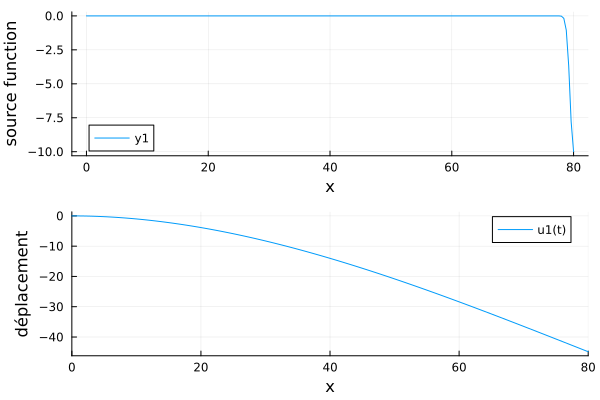

In [23]:
xvec = Vector(0:dx:l)
fvec = source_function.(xvec)
p1 = plot(xvec,fvec)
xlabel!("x") 
ylabel!("source function")

p2 = plot( sol1, idxs = (1))
xlabel!("x") 
ylabel!("déplacement")


plot(p1,p2,layout=(2,1))